In [41]:
import os
import win32com.client as win32
import time
import pandas as pd

aspen = win32.Dispatch("Apwn.Document")
"""
CHECK if the reaction indices are correct
"""
aspen.InitFromArchive2(os.path.abspath("D:/saf_hdo/aspen/250926_pyrolysis_oil_CC.apw"))
aspen.Visible = True
aspen.SuppressDialogs = True

In [42]:
# aspen.Engine.Run2()
rxtor1 = aspen.Tree.FindNode("\Data\Blocks\R-201\Input\CONV")
rxtor2 = aspen.Tree.FindNode("\Data\Blocks\R-202\Input\CONV")
rxtor3 = aspen.Tree.FindNode("\Data\Blocks\R-203\Input\CONV")

hdo_prod = aspen.Tree.FindNode("\Data\Streams\\208\Output\MASSFLOW\MIXED")

In [43]:
hdo_WATER = hdo_prod.Elements("WATER")
hdo_C21 = hdo_prod.Elements("C21H24O5")

print("  RXN 30 || Produced WATER || Produced C21H24O5")
print(f"{rxtor1.Elements('30').Value} || {hdo_WATER.Value} || {hdo_C21.Value}")

rxtor1.Elements("30").Value = 0.1
time.sleep(2)
aspen.Engine.Run2()
time.sleep(2)

print(f"{rxtor1.Elements('30').Value} || {hdo_WATER.Value} || {hdo_C21.Value}")

  RXN 30 || Produced WATER || Produced C21H24O5
1.0 || 13649.0654 || 0.0
0.1 || 13311.5015 || 1335.68871


In [44]:
data_path = "D:\saf_hdo\HDO_exp.xlsx"
xls = pd.ExcelFile(data_path)
data = pd.read_excel(xls).fillna(0)
component_list = [
    'BIOMASS', 'WATER', 'H2', 'O2', 'N2', 'AR', 'CO', 'CO2', 'CH4',
    'C2H4', 'C2H4O', 'C2H4O2', 'C2H6', 'C2H6O', 'C3H6', 'C3H8',
    'C3H8O', 'C3H8O2', 'C4H10', 'C4H4O', 'C4H8O', 'C5H4O2', 'C5H12',
    'C6H6', 'C6H6O', 'C6H8O', 'C6H12', 'C6H12O6', 'C6H14', 'C6H14O6',
    'C7H8', 'C7H8O', 'C7H14', 'C7H14-CY', 'C7H14-ME', 'C8H10', 'C8H10O',
    'C8H16', 'C8H18', 'C8H16-CY', 'C9H10O3', 'C9H18', 'C9H20', 'C9H20-A',
    'C10H22-C', 'C11H14O', 'C11H20-C', 'C11H24', 'C12H16O2', 'C12H20-C',
    'C12H26', 'C13H18O2', 'C13H20O2', 'C13H26', 'C13H28', 'C14H12',
    'C14H20O2', 'C14H28A', 'C14H30', 'C15H28', 'C16H32', 'C16H34',
    'C17H34', 'C17H36', 'C18H38', 'C19H24O2', 'C19H38', 'C19H40', 'C20H40',
    'C20H42', 'C21H24O5', 'C21H42', 'C22H26O5', 'C22H44', 'C23H28O5',
    'C23H46', 'C24H32O3', 'C24H48', 'C25H30O3', 'C25H50', 'C26H42O4',
    'C26H52', 'C27H54', 'C28H56', 'C29H58', 'C30H62', 'SO2', 'NO2',
    'ACIDS', 'ALDEHYDE', 'KETONES', 'ALCOHOLS', 'GUAIACOL', 'LMWS',
    'HMWS', 'EXTRACTI', 'N2COMP', 'SCOMPOUN', 'S', 'C', 'ASH', 'SIO2',
    'LMWLA', 'LMWLB', 'HLB', 'NH3'
]
component_to_carbon_number = {
    "ACIDS": 4,
    "ALDEHYDE": 8,
    "KETONES": 3,
    "ALCOHOLS": 6,
    "GUAIACOL": 7,
    "LMWS": 6,
    "HMWS": 12,
    "EXTRACTI": 20,
    # "N2COMP": 8,
    # "SCOMPOUN": 12,
    "LMWLA": 16,
    "LMWLB": 12,
    "HLB": 17,
}
carbon_number_list = data['Carbon'].tolist()
carbon_number_to_component = {n: [c for c in component_list if f"C{n}" in c] for n in carbon_number_list}
for c, n in component_to_carbon_number.items():
    if n in carbon_number_list:
        carbon_number_to_component[n].append(c)

hdo_rxtors = [rxtor1, rxtor2, rxtor3]
n_rxns = [len(r.Elements) for r in hdo_rxtors]

hdo_prod_composition = [hdo_prod.Elements(c).Value for c in component_list]

# node = aspen.Tree.FindNode(f"\Data\Streams\\208\Output\MASSFLOW\MIXED")
# massflow = [0 if node.Elements(c).Value is None else node.Elements(c).Value for c in component_list]
# total_massflow = sum(massflow)
# carbon_number_composition = {n: sum([massflow[component_list.index(c)]/total_massflow for c in cs]) for n, cs in carbon_number_to_component.items()}


In [45]:
def get_carbon_number_composition(stream_no):
    node = aspen.Tree.FindNode(f"\Data\Streams\\{stream_no}\Output\MASSFLOW\MIXED")
    massflow = [0 if node.Elements(c).Value is None else node.Elements(c).Value for c in component_list]
    total_massflow = sum(massflow)
    carbon_number_composition = {n: sum([massflow[component_list.index(c)]/total_massflow for c in cs]) for n, cs in carbon_number_to_component.items()}
    return carbon_number_composition

get_carbon_number_composition(208)

{6: 0.011528005342409471,
 7: 0.06529973343538918,
 8: 0.07953054738774898,
 9: 0.046210619018558996,
 10: 0.08025463522701365,
 11: 0.04577056770316791,
 12: 0.030624007277491157,
 13: 0.04183083829540843,
 14: 0.023535105045163086,
 15: 0.004731827522788802,
 16: 0.005458872605904614,
 17: 0.004031032243044732,
 18: 0.002874330877198539,
 19: 5.632251967207836e-06,
 20: 0.0011841068894370764,
 21: 0.03989936387295031,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0}

이게 rxn number가 consecutive하지 않고 이따금씩 비어있는 숫자가 있는데.. 그걸 하나씩 찾아내는 함수가 필요할 것으로 보임.

In [54]:
case_target = 'a'
target_sum = sum(data[case_target])
target_data = {n: c / target_sum for n, c in zip(data['Carbon'], data[case_target])}

rxn_idx = []
for ii, rr in enumerate(hdo_rxtors):
    rii = []
    for n in range(n_rxns[ii]):
        rii.append(n+1)
    rxn_idx.append(rii)


def apply_rxn(ri_test, rxn_coef):
    ri_valid = []
    for ii, rii in enumerate(ri_test):
        rii_valid = []
        for n in range(n_rxns[ii]):
            for k in range(10):
                try:
                    print(f"Try {rii[n]} for {n}")
                    rxtor1.Elements(f"{rii[n]}").Value = rxn_coef[ii][n]
                    rii_valid.append(rii[n])
                    break
                except:
                    print(f"Error: rxtor{ii}--rxn{rii[n]}")
                    rii.remove(rii[n])
                    rii.append(rii[-1] + 1)
                    print(f"Appended {rii[-1]}")

        ri_valid.append(rii_valid)

    time.sleep(2)
    aspen.Engine.Run2()
    time.sleep(2)

    prod = get_carbon_number_composition(208)
    mse = sum((target_data[n] - prod[n])**2 for n in target_data.keys()) * 10
    print(f"Success: {mse}")
    return ri_valid, mse

r_new = r_now.copy()
r_new[0][29] = 1.0
rxn_idx_valid, mse = apply_rxn(rxn_idx, r_new)
print(rxn_idx_valid)

Try 1 for 0
Try 2 for 1
Try 3 for 2
Try 4 for 3
Try 5 for 4
Try 6 for 5
Try 7 for 6
Try 8 for 7
Try 9 for 8
Try 10 for 9
Try 11 for 10
Try 12 for 11
Try 13 for 12
Try 14 for 13
Try 15 for 14
Try 16 for 15
Try 17 for 16
Try 18 for 17
Try 19 for 18
Try 20 for 19
Try 21 for 20
Try 22 for 21
Try 23 for 22
Try 24 for 23
Try 25 for 24
Try 26 for 25
Try 27 for 26
Try 28 for 27
Try 29 for 28
Try 30 for 29
Try 31 for 30
Try 32 for 31
Try 33 for 32
Try 34 for 33
Try 35 for 34
Error: rxtor0--rxn35
Appended 35
Try 35 for 34
Error: rxtor0--rxn35
Appended 35
Try 35 for 34
Error: rxtor0--rxn35
Appended 35
Try 35 for 34
Error: rxtor0--rxn35
Appended 35
Try 35 for 34
Error: rxtor0--rxn35
Appended 35
Try 35 for 34
Error: rxtor0--rxn35
Appended 35
Try 35 for 34
Error: rxtor0--rxn35
Appended 35
Try 35 for 34
Error: rxtor0--rxn35
Appended 35
Try 35 for 34
Error: rxtor0--rxn35
Appended 35
Try 35 for 34
Error: rxtor0--rxn35
Appended 35
Try 1 for 0
Try 2 for 1
Try 3 for 2
Try 4 for 3
Try 5 for 4
Try 6 for 5
T

현재 BO Iteration: 0
[[1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00 3.0e-02 8.5e-01 1.0e-05 1.5e-02
  1.0e+00 1.0e+00 5.0e-02 3.8e-01 1.0e+00 4.4e-01 4.7e-01 1.0e+00 3.5e-01
  2.5e-01 2.0e-01 1.0e+00 2.0e-01 1.0e+00 7.5e-01 4.0e-01 7.3e-01 1.0e+00
  1.0e+00 0.0e+00 1.0e-01 1.0e+00 1.0e+00 1.0e+00 1.0e+00 1.0e+00]]
Success: 1.1469716212160663
현재 BO Iteration: 1
[[0.28726166 0.1796125  0.05771811 0.63532003 0.18291068 0.86932008
  0.25901767 0.2702816  0.08344923 0.63527699 0.08436395 0.95358855
  0.98994534 0.06322684 0.83160974 0.7556669  0.07166068 0.80916447
  0.65949331 0.40388977 0.40915728 0.62869193 0.06347061 0.0404255
  0.50282552 0.27006967 0.69094708 0.7920383  0.78793782 0.68604281
  0.64493259 0.01366603 0.03976992 0.72223528 0.96308188]]
Success: 1.1308324094724265
현재 BO Iteration: 2
[[7.24257327e-01 4.78121204e-01 1.47017362e-01 4.79277957e-01
  2.88578274e-01 7.65658181e-01 4.97694493e-01 7.58321619e-01
  1.70586375e-02 9.86032439e-02 2.35981853e-01 5.06679002e-01
  7.66218772e

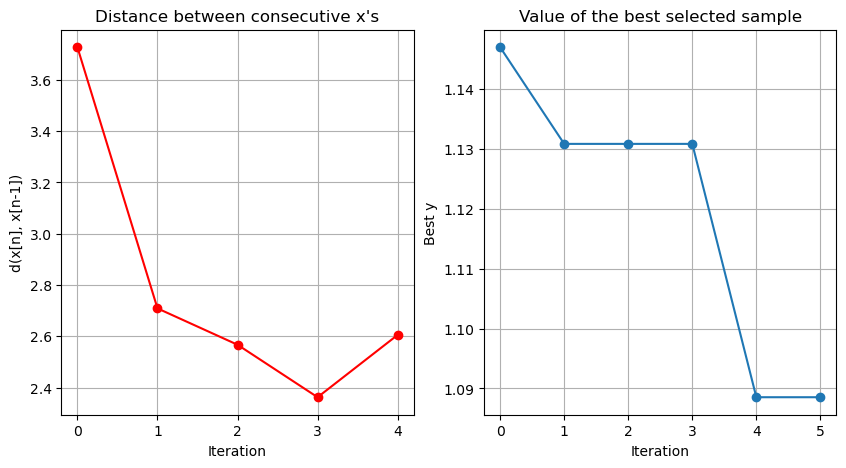

In [24]:
import GPy
import GPyOpt
from GPyOpt.methods import ModularBayesianOptimization
import numpy as np
domain = [
    {'name': f'rxn1_coef{i}', 'type': 'continuous', 'domain': (0, 1)} for i in range(n_rxns[0])
]
r_init_np = np.array(r_now[0]).reshape(1, -1)

def get_hdo_results_numpy(rxn_coef):
    print(rxn_coef)
    for n in range(n_rxns[0]):
        rxtor1.Elements(f"{n+1}").Value = rxn_coef[0, n]

    time.sleep(2)
    aspen.Engine.Run2()
    time.sleep(2)

    prod = get_carbon_number_composition(208)
    mse = sum((target_data[n] - prod[n])**2 for n in target_data.keys()) * 10
    print(f"Success: {mse}")
    return mse

# print("Test function:")
# get_hdo_results_numpy(r_init_np)


class HDO_Evaluator(object):
    def __init__(self):
        self.iteration_count = 0  # 반복 횟수 카운터 초기화

    def evaluate(self, rxn_coef):
        print(f"현재 BO Iteration: {self.iteration_count}")
        val = get_hdo_results_numpy(rxn_coef)
        self.iteration_count += 1
        return val


# Kernel function for Bayesian optimization: m52
m52 = GPy.kern.Matern52(input_dim=r_init_np.shape[1], variance=1.0, lengthscale=1.0)

hdo_evaluator = HDO_Evaluator()
objective = GPyOpt.core.task.SingleObjective(hdo_evaluator.evaluate)

# Gaussian process regression model
model = GPyOpt.models.GPModel(kernel=m52, exact_feval=True,
                              optimize_restarts=25, verbose=False)

# Acquisition function: Expected improvement (EI)
domain_space = GPyOpt.Design_space(space=domain)

acquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(domain_space)
acquisition = GPyOpt.acquisitions.AcquisitionEI(model, domain_space, optimizer=acquisition_optimizer)
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

# Set Bayesian optimization
BO = ModularBayesianOptimization(model, domain_space, objective, acquisition, evaluator, r_init_np)

# Maximum time and iterations for Bayesian optimization
max_time = None
max_iter = 100
tolerance = -np.inf

# Run Bayesian optimization
BO.run_optimization(max_iter=max_iter, max_time=max_time, eps=tolerance, verbosity=False)
BO.plot_convergence()

In [28]:
optimal_rxn_coef = BO.x_opt
print(optimal_rxn_coef)
optimal_rxn_coef[-1] = 1.
optimal_result = hdo_evaluator.evaluate(optimal_rxn_coef.reshape(1, -1))

[0.26972549 0.34236508 0.2531209  0.79684556 0.25283771 0.17314569
 0.32509248 0.71051085 0.11688532 0.69032776 0.07063429 0.93271006
 0.12865257 0.89485185 0.24023759 0.13530261 0.19307871 0.3557812
 0.93036202 0.32726551 0.20575546 0.34276491 0.68753984 0.41375825
 0.18770762 0.27018142 0.05714003 0.11250878 0.18190232 0.9575492
 0.55171196 0.28586137 0.46264    0.74323538 0.05509915]
현재 BO Iteration: 7
[[0.26972549 0.34236508 0.2531209  0.79684556 0.25283771 0.17314569
  0.32509248 0.71051085 0.11688532 0.69032776 0.07063429 0.93271006
  0.12865257 0.89485185 0.24023759 0.13530261 0.19307871 0.3557812
  0.93036202 0.32726551 0.20575546 0.34276491 0.68753984 0.41375825
  0.18770762 0.27018142 0.05714003 0.11250878 0.18190232 0.9575492
  0.55171196 0.28586137 0.46264    0.74323538 1.        ]]
Success: 1.0947673502193873


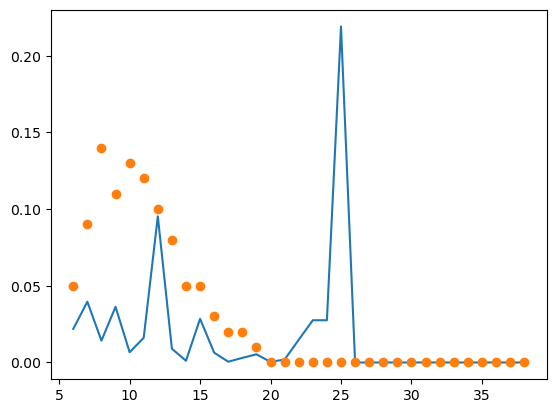

In [29]:
import matplotlib.pyplot as plt
cc = get_carbon_number_composition(208)
plt.plot(cc.keys(), cc.values(), '-')
plt.plot(target_data.keys(), target_data.values(), 'o')

* Improvement가 있긴 한데, long chain components가 너무 많이 남는다 -- 지금 C23-25 분해 반응이 포함 안 되어 있음.
* C12H16O2의 physical property parameter가 없어서 B22에서 에러 발생 -- 왜 C12가 SMR 반응기로 들어가는지? Flash에서 trace gas가 흘러감. C12 property 추가하거나 물질 변경.
* 150번 정도 iteration을 돌고 나면 aspen이 꺼진다 -- 먼저는 run에서 application 이 인식이 안 되면 다시 잡는 식으로 함수 구조 확장 필요.

In [56]:
# Close the file without saving
# SaveOption: 0 = Do not save changes
#             1 = Save changes
#             2 = Prompt the user
aspen.Close(0)
aspen.Close(0)